# WeatherPy

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import random
import csv
import json
from pandas.io.json import json_normalize

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [81]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=10000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=10000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

2331

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [82]:
# Convert cities list to pandas df
cities_df = pd.DataFrame(np.array(cities)).rename(columns={0: "City"})

# owm settings dictionary # data = owm.get_current("Kassel,DE", **settings)
settings = {"APPID": api_key, "units": "imperial"}

In [83]:
# Collect weather information in weather_data for each city in the cities list
# Waits 61 seconds every 60 calls
weather_data = []
call_count = 1
call_set_number = 1
print('Beginning Data Retrieval')
print('-----------------------------')
for index, row in cities_df.iterrows():
    if call_count == 61:
        time.sleep(61)
        call_count = 1
        call_set_number += 1
    print(f"Processing call set {call_set_number}, row {index+1} of {len(cities_df)}: {row['City']}")
    try:
        weather_data.append(owm.get_current(row['City'], **settings))
    except:
        print('City not found. Skipping...')
    call_count += 1

Beginning Data Retrieval
-----------------------------
Processing call set 1, row 1 of 2331: iqaluit
Processing call set 1, row 2 of 2331: thinadhoo
Processing call set 1, row 3 of 2331: ponta do sol
Processing call set 1, row 4 of 2331: avarua
Processing call set 1, row 5 of 2331: busselton
Processing call set 1, row 6 of 2331: karratha
Processing call set 1, row 7 of 2331: peniche
Processing call set 1, row 8 of 2331: castro
Processing call set 1, row 9 of 2331: shaunavon
Processing call set 1, row 10 of 2331: east london
Processing call set 1, row 11 of 2331: victoria
Processing call set 1, row 12 of 2331: shache
Processing call set 1, row 13 of 2331: illoqqortoormiut
City not found. Skipping...
Processing call set 1, row 14 of 2331: clyde river
Processing call set 1, row 15 of 2331: ambodifototra
City not found. Skipping...
Processing call set 1, row 16 of 2331: butaritari
Processing call set 1, row 17 of 2331: kaitangata
Processing call set 1, row 18 of 2331: katsuura
Processing c

In [123]:
print(weather_data[0])

{'coord': {'lon': -68.52, 'lat': 63.75}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 32, 'pressure': 1015, 'humidity': 99, 'temp_min': 32, 'temp_max': 32}, 'visibility': 8047, 'wind': {'speed': 2.24, 'deg': 140}, 'clouds': {'all': 90}, 'dt': 1572372512, 'sys': {'type': 1, 'id': 797, 'country': 'CA', 'sunrise': 1572350682, 'sunset': 1572381043}, 'timezone': -14400, 'id': 5983720, 'name': 'Iqaluit', 'cod': 200}


In [129]:
print(weather_data[0]['dt'])

1572372512


In [132]:
# Create list of lists containing required data from pull
weather_data_list = []
keys = ['name',
        'coord.lat',
        'coord.lon',
        'sys.country',
        'dt',
        'main.temp_max',
        'main.humidity',
        'clouds.all',
        'wind.speed']
for row in weather_data:
    weather_data_list.append(row.get_many(keys))
print(weather_data_list[0])

('Iqaluit', 63.75, -68.52, 'CA', 1572372512, 32, 99, 90, 2.24)


In [133]:
# Convert list to dataframe with named columns
cities_weather_df = pd.DataFrame(weather_data_list, columns = ['City',
                                                               'Latitude',
                                                               'Longitude',
                                                               'Country',
                                                               'Date',
                                                               'Max Temperature (F)',
                                                               'Humidity %',
                                                               'Cloudiness %',
                                                               'Wind (mph)'])
cities_weather_df

,City,Latitude,Longitude,Country,Date,Max Temperature (F),Humidity %,Cloudiness %,Wind (mph)
0,Iqaluit,63.75,-68.52,CA,1572372512,32.00,99,90,2.24
1,Thinadhoo,0.53,72.93,MV,1572372512,81.95,75,100,8.34
2,Ponta do Sol,-20.63,-46.00,BR,1572372512,79.81,59,89,11.12
3,Avarua,-21.21,-159.78,CK,1572372462,71.60,73,100,10.29
4,Busselton,-33.64,115.35,AU,1572372512,53.01,67,83,0.63
...,...,...,...,...,...,...,...,...,...
2095,Lyngseidet,69.58,20.21,NO,1572375359,30.20,86,75,2.24
2096,Houma,35.63,111.36,CN,1572375359,52.86,31,14,2.06
2097,Bhuj,23.25,69.67,IN,1572375360,79.29,72,95,13.96
2098,Lakselv,70.05,24.96,NO,1572375360,30.20,79,75,17.22


In [134]:
# Save cities_weather_df to csv
cities_weather_df.to_csv(output_data_file, index=False)

In [ ]:
# Read in cites_weather_df if necessary
# cities_weather_df = pd.read_csv(output_data_file)

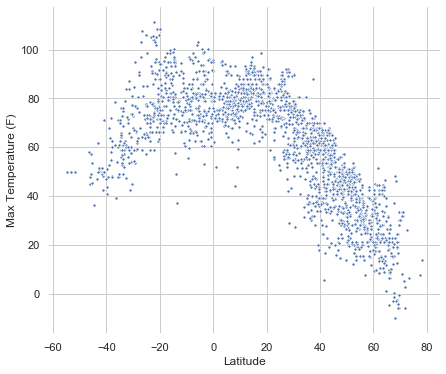

In [137]:
# Create plot dataframe
lat_temp_df = cities_weather_df[['Latitude', 'Max Temperature (F)']]

# Set style and figure size
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,6)) 

# Plot
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="Latitude", y="Max Temperature (F)", data=lat_temp_df, s=10)

plt.show(ax)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

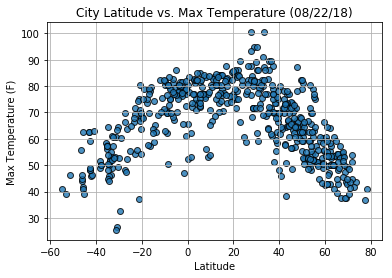

#### Latitude vs. Humidity Plot

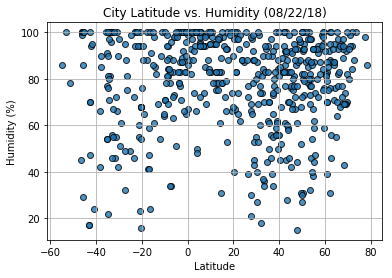

#### Latitude vs. Cloudiness Plot

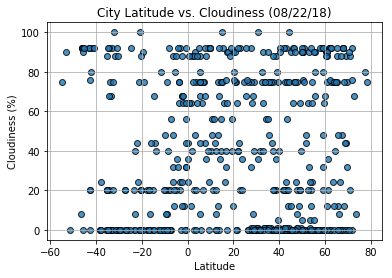

#### Latitude vs. Wind Speed Plot

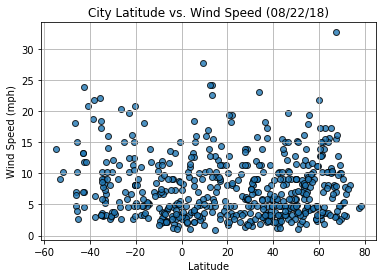